# Diabetes Prediction :

In this Diabetes Prediction project, We shall draw conclusions from the diabetic data set. Their distribution, classifications, and causes for causing diabetes in individuals

We will also create a suitable ML model to foretell whether a person will develop diabetes or not.

# Importing Libraries:

In [1]:
#Importing libraries for Analysis ,Visualisation 

import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


In [2]:
# importing libraries for ML

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning and Preparation :

In [3]:
# loading the dataset

df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(f'The dataset contains {df.shape} rows and columns respectively')

The dataset contains (768, 9) rows and columns respectively


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Replacing columns with lower case letters

df.columns = df.columns.str.lower()

In [9]:
#checking for missing data / values

df.isnull().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [10]:
df['bloodpressure'].value_counts

<bound method IndexOpsMixin.value_counts of 0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: bloodpressure, Length: 768, dtype: int64>

**No Missing data found, But we could see there are some inappropriate values**

In [11]:
# Checking for Zero / Inapprorpiate Values

for col in df.columns:
    zero_values = len(df[df[col] <= 0])
    print(f'Zero values in column {col} = {zero_values}')

Zero values in column pregnancies = 111
Zero values in column glucose = 5
Zero values in column bloodpressure = 35
Zero values in column skinthickness = 227
Zero values in column insulin = 374
Zero values in column bmi = 11
Zero values in column diabetespedigreefunction = 0
Zero values in column age = 0
Zero values in column outcome = 500


In [12]:
# Replacing Zero / Inapprorpiate Values with Median values

col_containing_zero = ["glucose","bloodpressure","skinthickness","insulin","bmi"]
for col in col_containing_zero:
    median = df[col].median()
    df.loc[df[col]<=0,col] = median

In [13]:
# Checking for Zero / Inapprorpiate Values after replacing with Median values

for col in df.columns:
    zero_values = len(df[df[col] <= 0])
    print(f'Zero values in column {col} = {zero_values}')

Zero values in column pregnancies = 111
Zero values in column glucose = 0
Zero values in column bloodpressure = 0
Zero values in column skinthickness = 0
Zero values in column insulin = 0
Zero values in column bmi = 0
Zero values in column diabetespedigreefunction = 0
Zero values in column age = 0
Zero values in column outcome = 500


**Now we've got rid of Zero / inappropriate Values in the Dataset** 

# Exploratory Data Analysis :

### Comparing Patient without Diabetes & Patient with Diabetes 

In [14]:
outcome_sum = df['outcome'].value_counts()
print(f'Patient without Diabetes = {outcome_sum[0]} & Patient with Diabetes = {outcome_sum[1]}')

Patient without Diabetes = 500 & Patient with Diabetes = 268


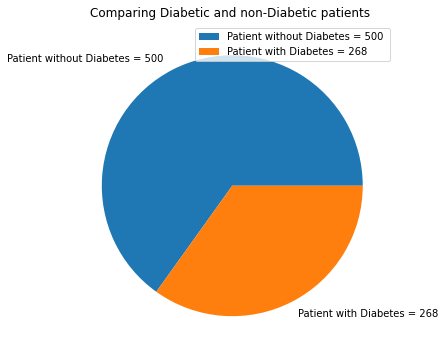

In [15]:
diabetes_count = np.array(df['outcome'].value_counts(sort=True))

labels = ['Patient without Diabetes = 500 ', 'Patient with Diabetes = 268']

plt.figure(figsize=(8,6))
plt.pie(diabetes_count, labels=labels)
plt.legend()
plt.title('Comparing Diabetic and non-Diabetic patients ')
plt.show()

<Figure size 576x432 with 0 Axes>

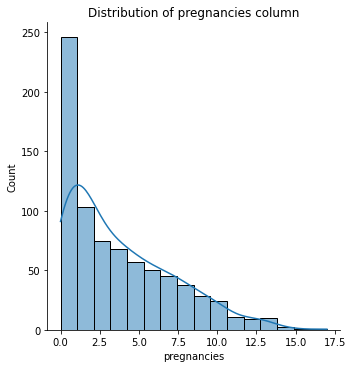

<Figure size 576x432 with 0 Axes>

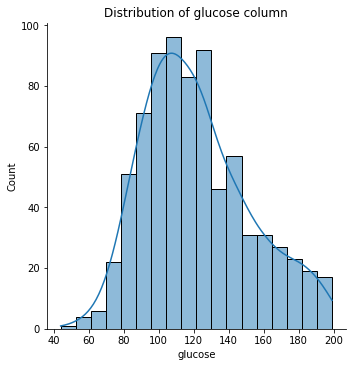

<Figure size 576x432 with 0 Axes>

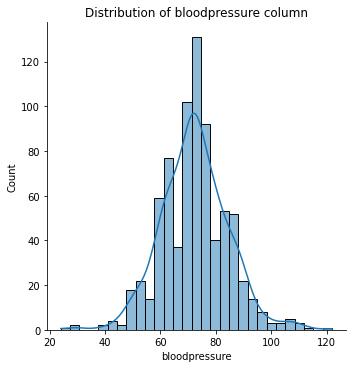

<Figure size 576x432 with 0 Axes>

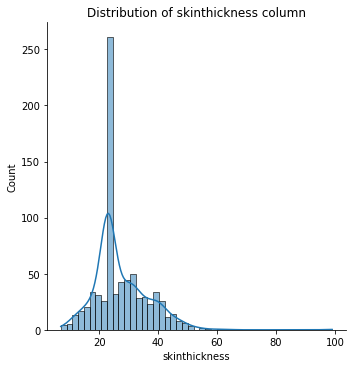

<Figure size 576x432 with 0 Axes>

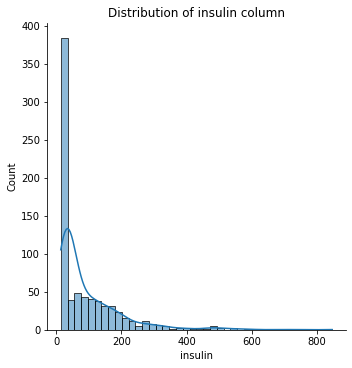

<Figure size 576x432 with 0 Axes>

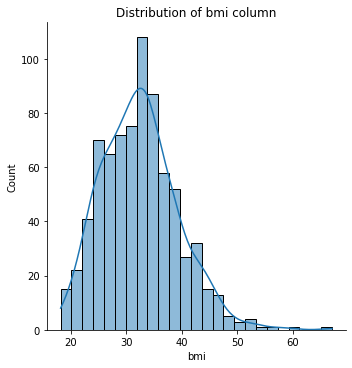

<Figure size 576x432 with 0 Axes>

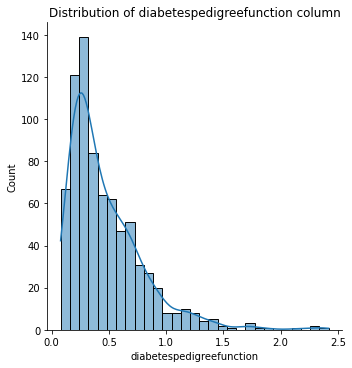

<Figure size 576x432 with 0 Axes>

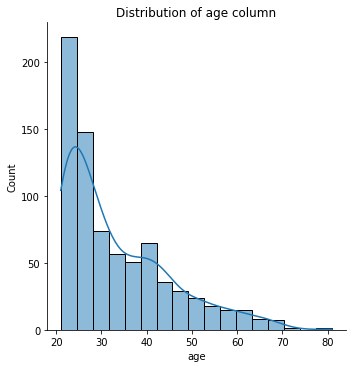

In [16]:
# making distplots of the following columns to see the distribution of data :

dist_columns = ['pregnancies', 'glucose',"bloodpressure","skinthickness","insulin","bmi","diabetespedigreefunction","age"]

for col in dist_columns:
    plt.figure(figsize=(8,6))
    sns.displot(df[col], kde = True)
    plt.title(f"Distribution of {col} column")
    plt.show()

# Analysing Correlation between Data & Outcome :

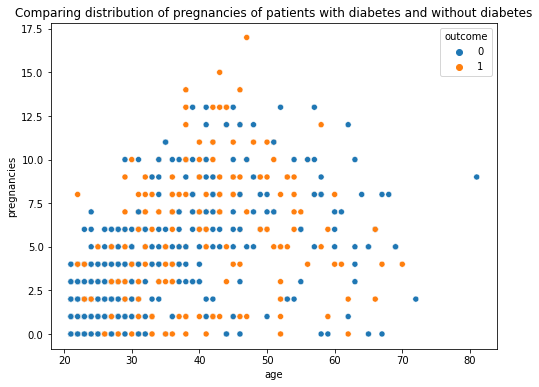

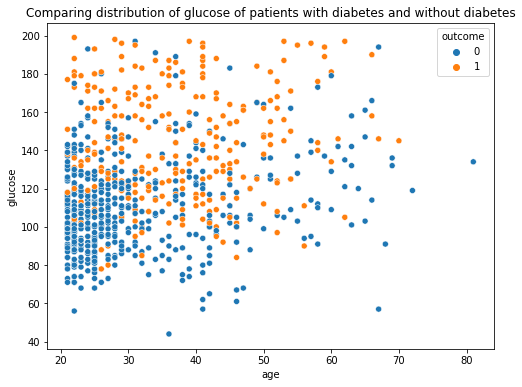

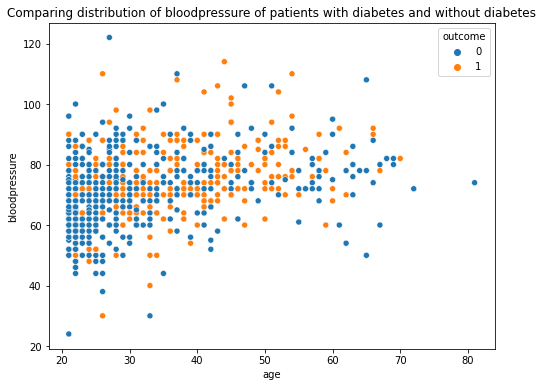

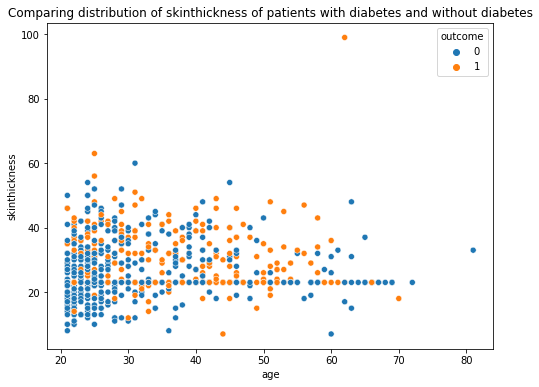

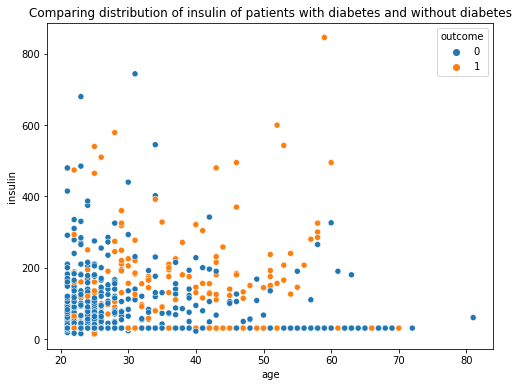

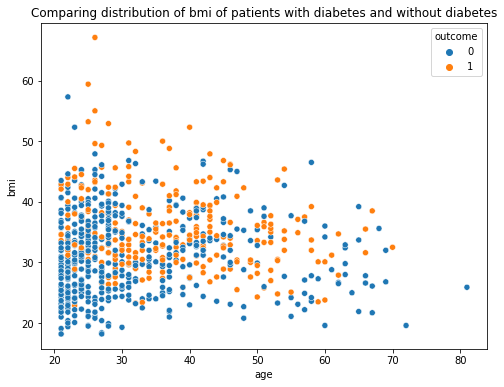

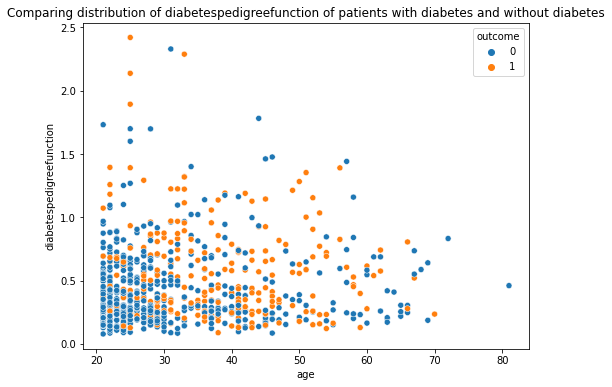

In [17]:
corr_columns = ['pregnancies', 'glucose',"bloodpressure","skinthickness","insulin","bmi","diabetespedigreefunction"]

for col in corr_columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="age",y=col,data=df,hue="outcome")
    plt.title(f"Comparing distribution of {col} of patients with diabetes and without diabetes")
    plt.show()

### Hence, we can conclude that person with Higher Glucose level , Higher BMI , lower Insulin & Family History have Higher chances of being Diabetic. 

# Machine Learning :

In [18]:
#Splittng the data as Train 20%,Validate 25% and Test data 60%

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_full_train = df_full_train.reset_index(drop = True)

In [19]:
y_train = df_train.outcome.values
y_val   = df_val.outcome.values
y_test  = df_test.outcome.values
y_full_train = df_full_train.outcome.values

In [20]:
#Removed the Target Variable from the dataset

del df_train['outcome']
del df_val['outcome']
del df_test['outcome']
del df_full_train['outcome']

# Model Selection and Evaluation

In [21]:
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier()

models = [dt, rfc]
model_names = ['DecisionTreeClassifier','RandomForestClassifier']
mean_score = []

for model in models:
    cross_score = cross_val_score(model,df_train,y_train,cv=5)
    average_score = np.mean(cross_score)
    mean_score.append(average_score)

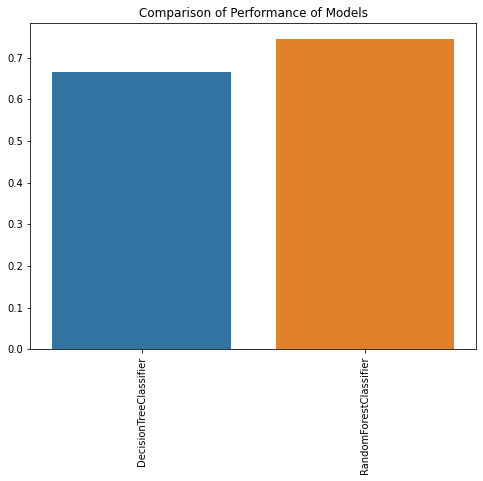

In [22]:
# plotting bar chart to compare the model performances and pointing out the best one

plt.figure(figsize=(8,6))
sns.barplot(model_names,mean_score)
plt.title("Comparison of Performance of Models")
plt.xticks(rotation=90)
plt.show()

#### Random Forest performs Better than Decision Tree

# Model Tuning :

### Let's Tune Random Forest Model to improve the Accuracy

In [23]:
rf = RandomForestClassifier(n_estimators=10,random_state=1)
rf.fit(df_train,y_train)
y_pred = rf.predict_proba(df_val)[:, 1]

In [24]:
#check the roc_auc score for the trained model

roc_auc_score(y_val,y_pred)

0.781804595553895

Model has 78.18% accuracy

#### Let's Tune the parameters to predict output with a higher level of accuracy

In [25]:
# Looking for the best n_estimators

scores = []

for n in range(10, 251, 10):
    rf = RandomForestClassifier(n_estimators=n,random_state=1)
    rf.fit(df_train,y_train)
    
    y_pred = rf.predict_proba(df_val)[:, 1]
    auc = roc_auc_score(y_val,y_pred)
    
    scores.append((n,auc))
    
columns = ['n_estimators', 'auc_score']    
df_scores = pd.DataFrame(scores,columns= columns)

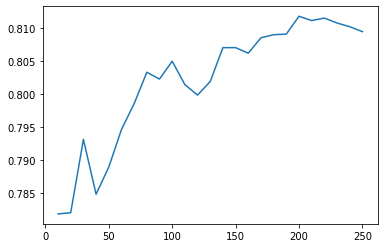

In [26]:
plt.plot(df_scores.n_estimators,df_scores.auc_score)

In [27]:
# Looking for the best max_depth

scores = []

for d in [5,10,15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(df_train,y_train)

        y_pred = rf.predict_proba(df_val)[:, 1]
        auc = roc_auc_score(y_val,y_pred)

        scores.append((d,n,auc))
        
columns = ['max_depth','n_estimators','auc']
df_scores = pd.DataFrame(scores,columns = columns)

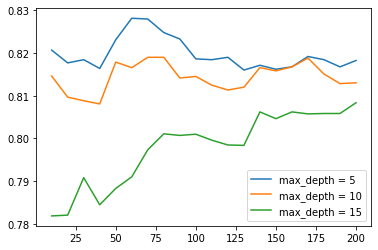

In [28]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators,df_subset.auc,label = 'max_depth = %s' % d)
    plt.legend()

In [29]:
max_depth = 5

In [30]:
# Looking for the best min_samples_leaf

scores = []

for s in [1,3,5,10,50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth = max_depth,
                                    min_samples_leaf= s,
                                    random_state = 1)
        rf.fit(df_train,y_train)

        y_pred = rf.predict_proba(df_val)[:, 1]
        auc = roc_auc_score(y_val,y_pred)

        scores.append((s,n,auc))
        
columns1 = ['min_samples_leaf','n_estimators','auc']
df_scores1 = pd.DataFrame(scores,columns = columns1)

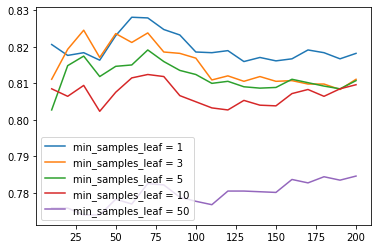

In [31]:
for s in [1,3,5,10,50]:
    df_subset = df_scores1[df_scores1.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators,df_subset.auc,label = 'min_samples_leaf = %s' % s)
    plt.legend()

We could see that Model peaked arounf n_estimators = 60 , max_depth = 5 & min_samples_leaf = 1 ,Hence tuning the model according to these parameters

### Final model with Tuned Parameters :

In [32]:
rf = RandomForestClassifier(n_estimators=60,max_depth=5, min_samples_leaf=1,random_state=1)
rf.fit(df_train,y_train)
y_pred = rf.predict_proba(df_val)[:, 1]

In [33]:
final_roc_auc_score = roc_auc_score(y_val,y_pred)
print(f'Accuracy of Tuned Randomforest Model = {round(final_roc_auc_score, 4)}')

Accuracy of Tuned Randomforest Model = 0.8281


### Checking the Model on Test Data

In [34]:
rf = RandomForestClassifier(n_estimators=60,max_depth=5, min_samples_leaf=1,random_state=1)
rf.fit(df_full_train,y_full_train)
y_pred = rf.predict_proba(df_test)[:, 1]

In [35]:
test_roc_auc_score = roc_auc_score(y_test,y_pred)
print(f'Accuracy on Test data = {round(test_roc_auc_score, 4)}')

Accuracy on Test data = 0.8724


**Conclusion and Inferences :**

* Random Forest model performed better on test data it has 87.24% accuracy compared to 82.81% on train data,
* The discrepancy between train and test scores might be because of under-representative data samples on Test Dataset,
* Also it perfomred better than Logistic regression model.


## Thank you for taking the time to read this notebook; please upvote and leave feedback!